In [1]:
from dataclasses import dataclass
import erdantic as erd

In [2]:
from model.extraction.energy_consumption import EnergyConsumption
from model.extraction.resource_consumption import ResourceConsumption

In [3]:
from model.transformation.economic_properties import ComplexityAndInvestment, Employment, Trade
from model.transformation.economic_layers import Layers
from model.transformation.economic_sectors import Sectors

In [4]:
from model.dissipation.need_satisfaction import NeedSatisfaction
from model.dissipation.waste import Waste
from model.dissipation.accumulation import Accumulation

In [5]:
@dataclass
class Extraction:
    energy_consumption: EnergyConsumption
    resource_consumption: ResourceConsumption


@dataclass
class Transformation:
    complexity_and_investment: ComplexityAndInvestment
    employment: Employment
    trade: Trade
    sectoral_composition: Sectors
    layer_composition: Layers


@dataclass
class Dissipation:
    need_satisfaction: NeedSatisfaction
    accumulation: Accumulation
    waste: Waste

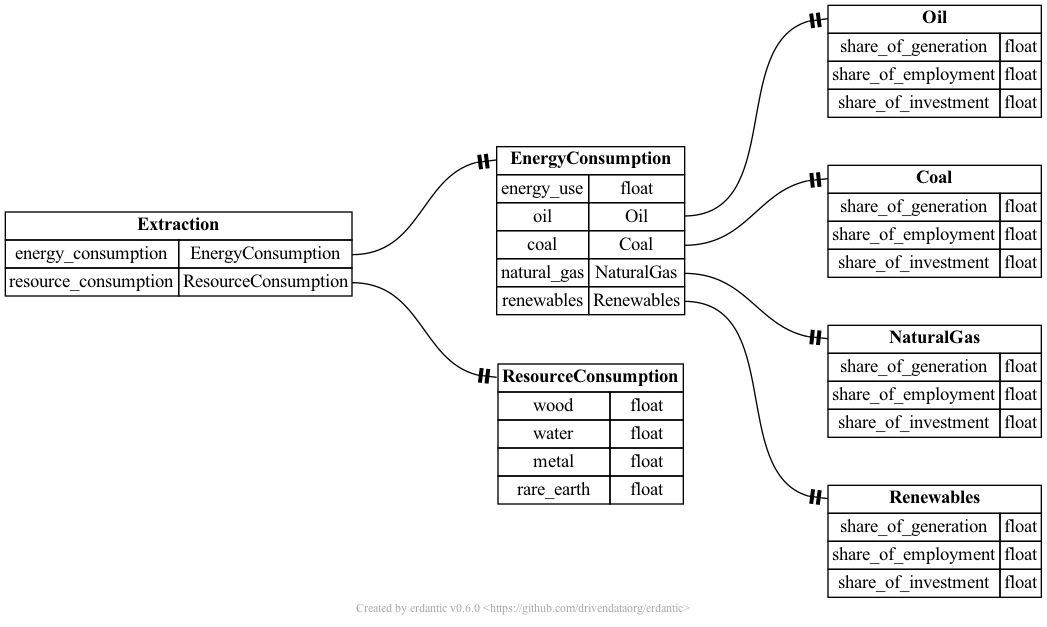

In [6]:
extraction_diagram = erd.create(Extraction)
extraction_diagram

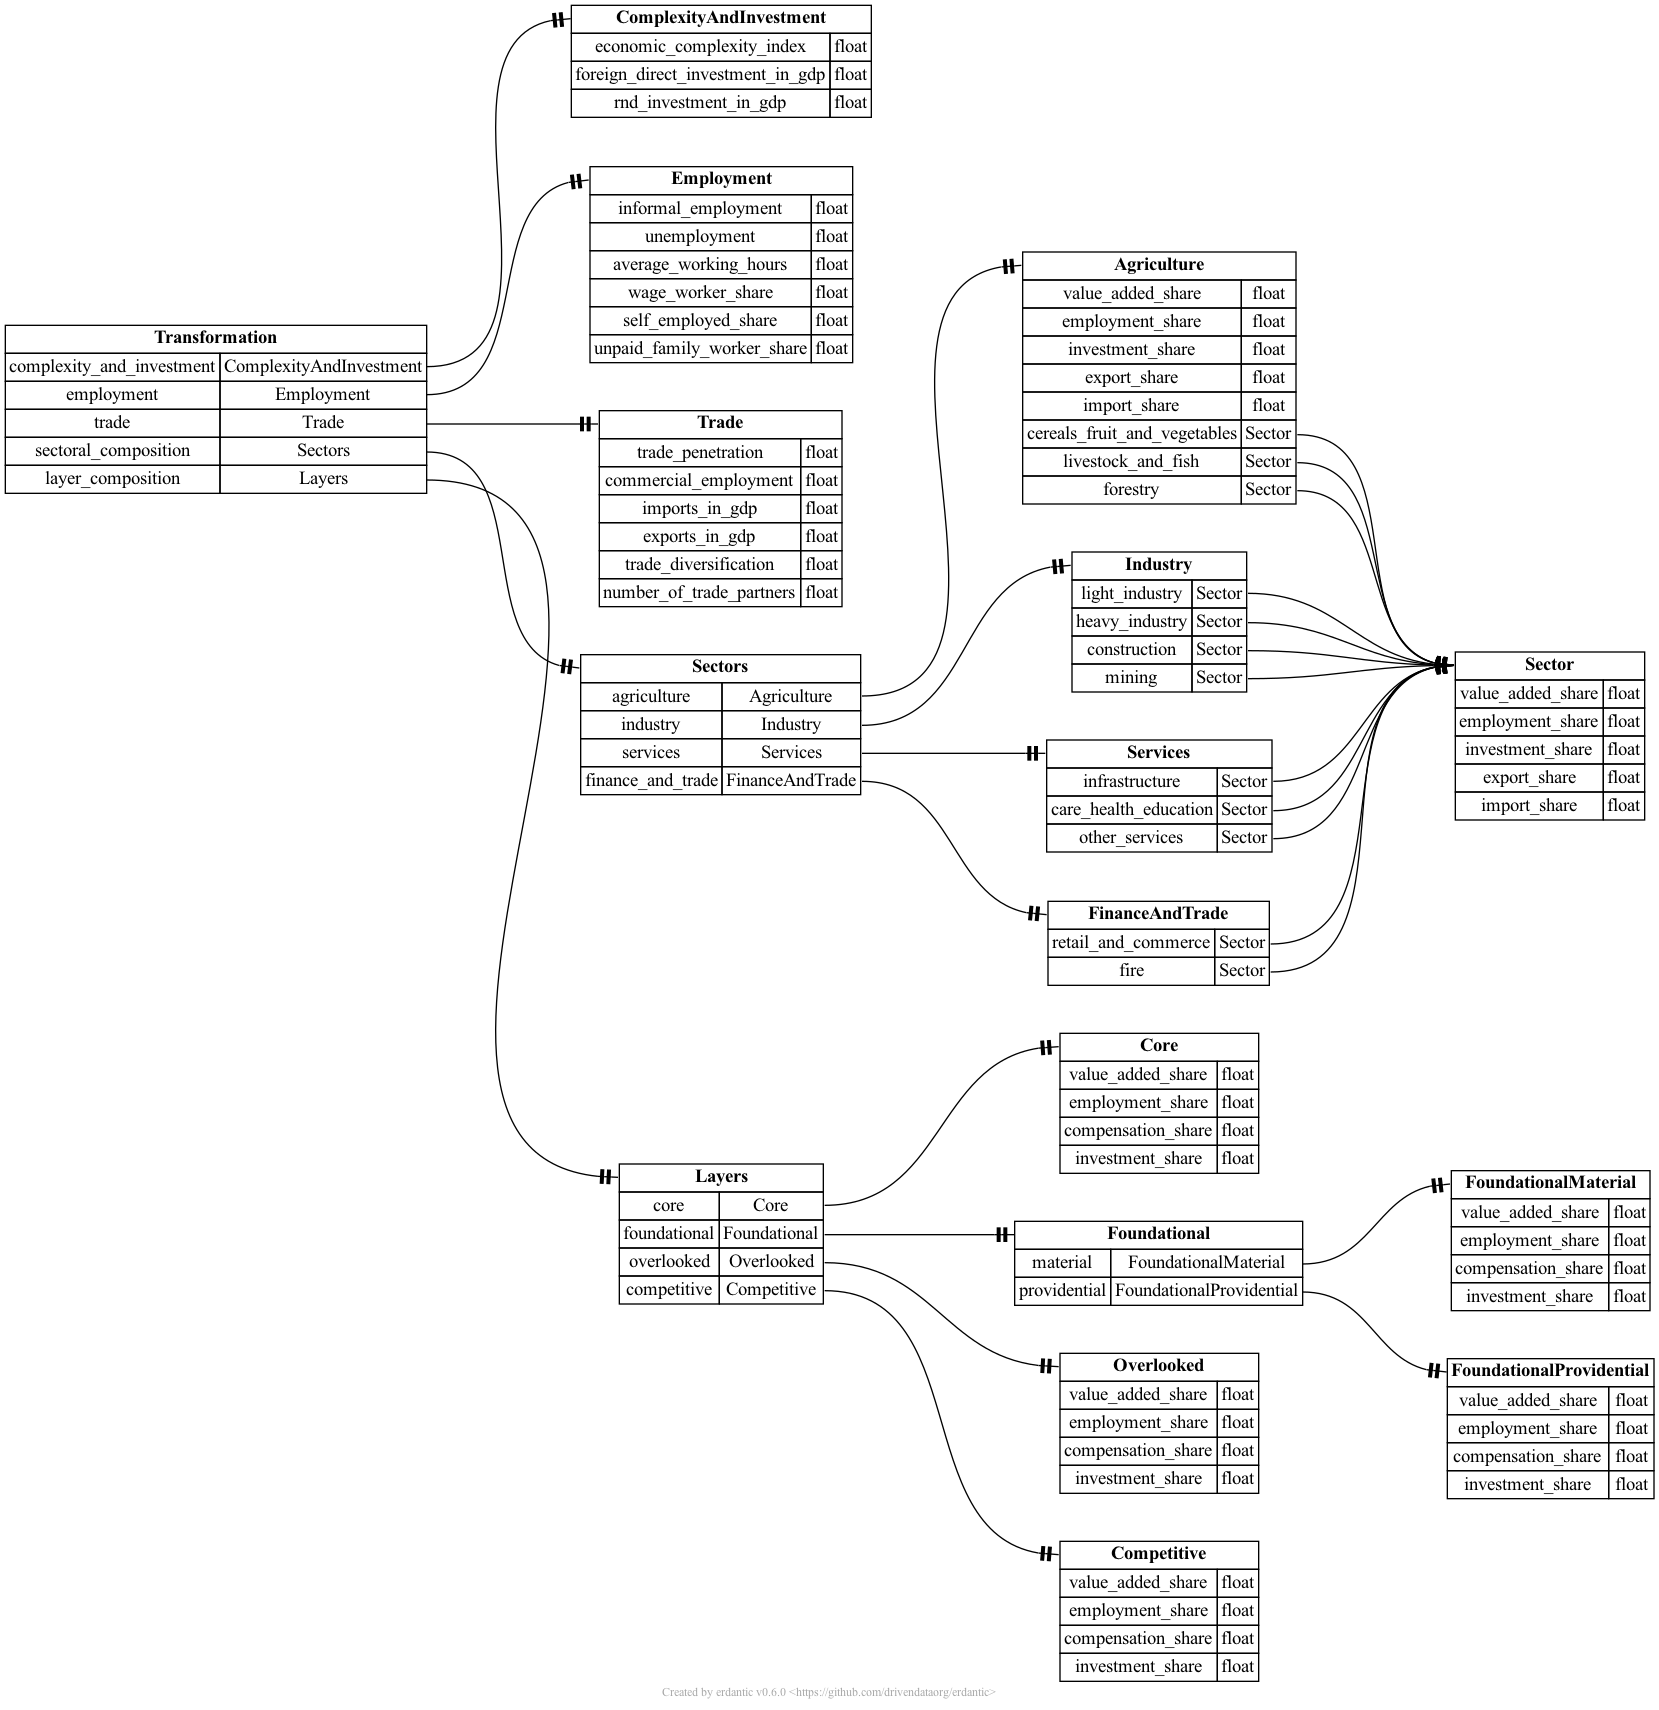

In [7]:
transformation_diagram = erd.create(Transformation)
transformation_diagram

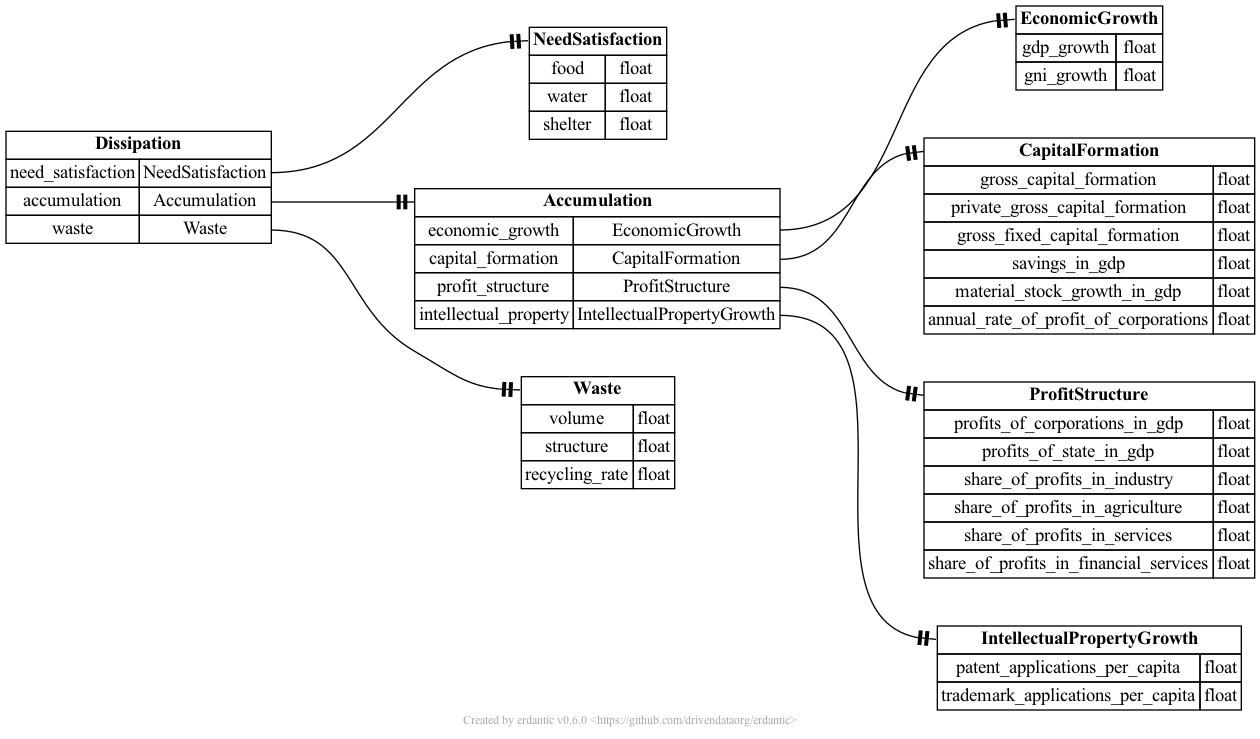

In [8]:
dissipation_diagram = erd.create(Dissipation)
dissipation_diagram

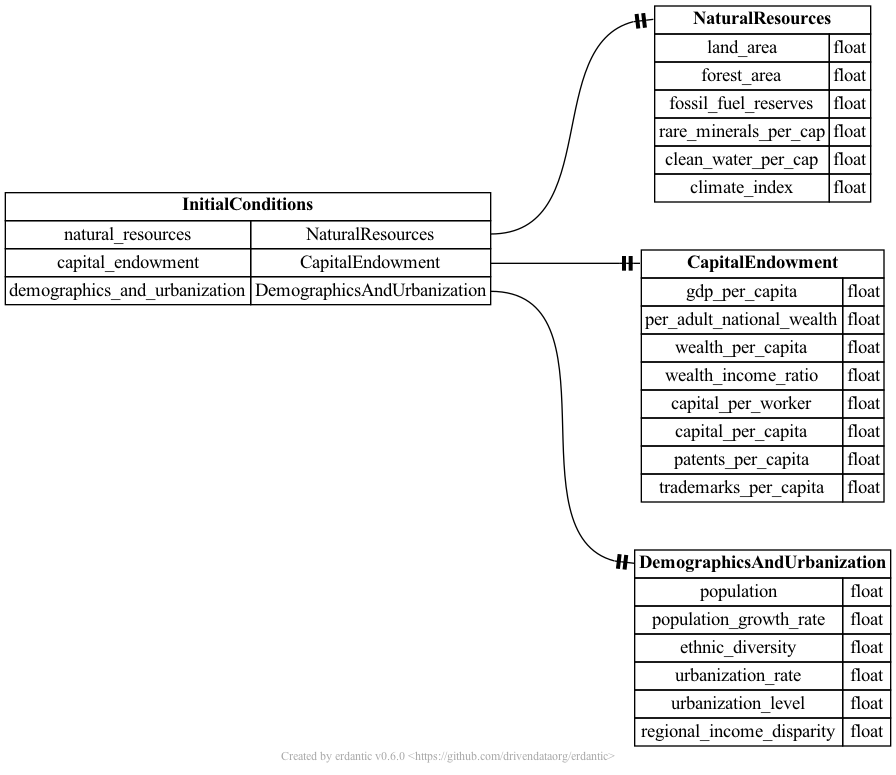

In [9]:
from model.initial_conditions import InitialConditions

initial_conditions_diagram = erd.create(InitialConditions)
initial_conditions_diagram

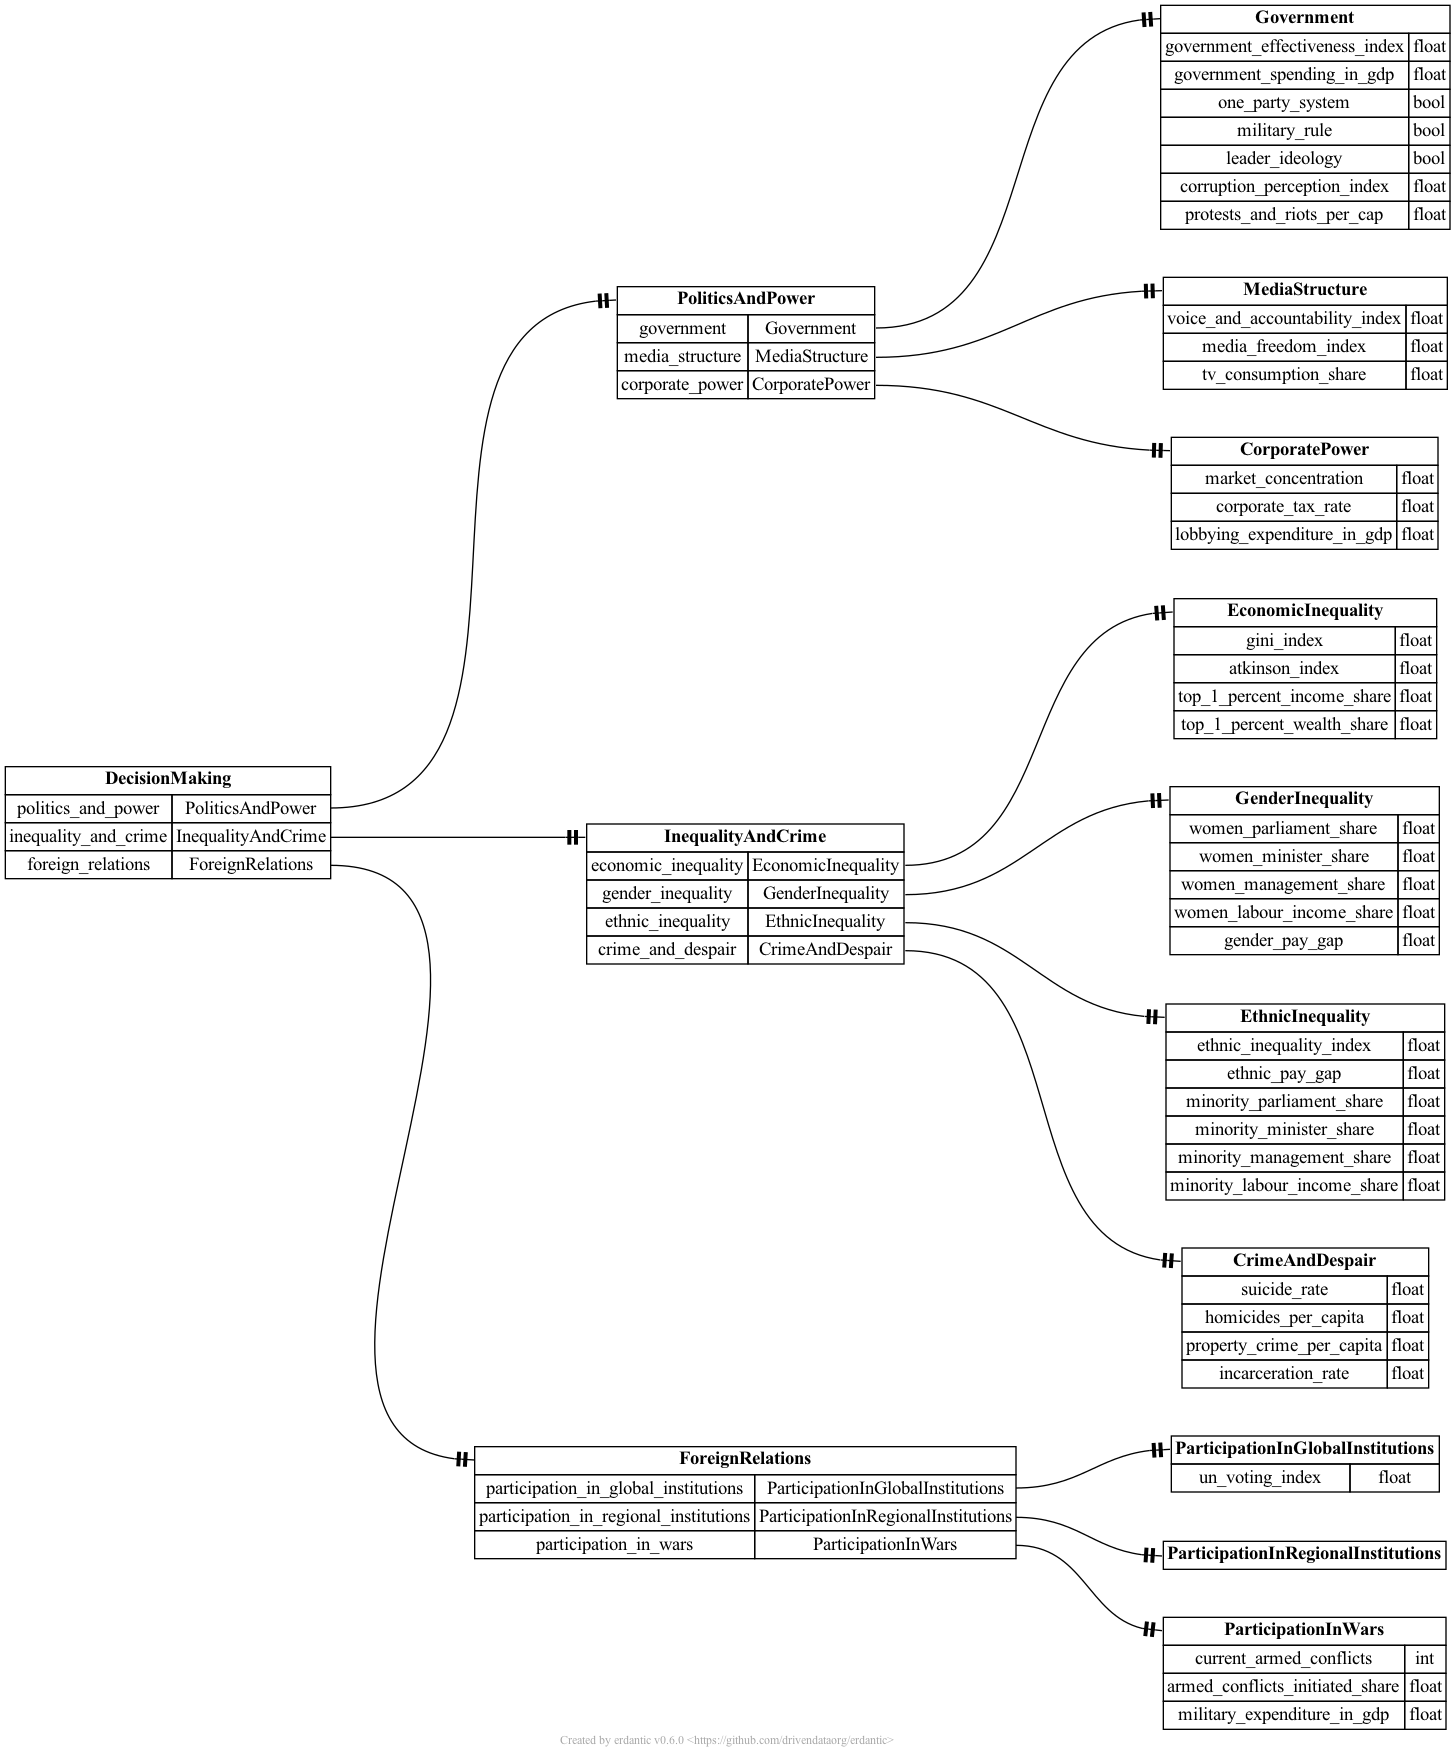

In [10]:
from model.decision_making import DecisionMaking

decision_making_diagram = erd.create(DecisionMaking)
decision_making_diagram

In [11]:
@dataclass
class Provisioning:
    initial_conditions: InitialConditions
    decision_making: DecisionMaking
    extraction: Extraction
    transformation: Transformation
    dissipation: Dissipation

In [12]:
from utils.image import concatenate_images_horizontally, save_erdantic_diagram

diagrams = [
    initial_conditions_diagram,
    decision_making_diagram,
    extraction_diagram,
    transformation_diagram,
    dissipation_diagram
]
output_path = 'provisioning.png'

img_paths = []
counter = 0
for diagram in diagrams:
    img_path = save_erdantic_diagram(diagram, f'provisioning_{counter}')
    img_paths.append(img_path)
    counter += 1

concatenate_images_horizontally(img_paths, output_path)